<a href="https://colab.research.google.com/github/DasithEdirisinghe/DSAXGB/blob/main/src/models/xGboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import io

In [2]:
from google.colab import files

uploaded = files.upload()

Saving CSE_DSIntro1_TRAIN.csv to CSE_DSIntro1_TRAIN.csv


In [3]:
df = pd.read_csv (io.BytesIO(uploaded['CSE_DSIntro1_TRAIN.csv']))
print(df)
df.info()

        Id  Column_1     Column_2  ...  Column_76  Column_77  Category
0        1   77041.5  44471.03389  ...          2       2021         0
1        2   77120.0  44516.34682  ...          2       2021         0
2        3   77120.0  44516.34682  ...          2       2021         0
3        4   77117.5  44514.90373  ...          2       2021         0
4        5   77120.0  44516.34682  ...          2       2021         0
...    ...       ...          ...  ...        ...        ...       ...
2495  2496   77117.5  44514.90373  ...          2       2021         1
2496  2497   77120.0  44516.34682  ...          2       2021         1
2497  2498   77117.5  44514.90373  ...          2       2021         1
2498  2499   77117.5  44514.90373  ...          2       2021         0
2499  2500   77120.0  44516.34682  ...          2       2021         0

[2500 rows x 79 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 79 columns):
 #   Column    

In [234]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import cross_val_score, KFold
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

In [321]:
X= df[['Column_4',
       'Column_6', 'Column_7', 'Column_8','Column_9', 'Column_10',
       'Column_11','Column_12', 'Column_13', 'Column_14', 'Column_15', 
       'Column_16','Column_17', 'Column_18', 'Column_19', 'Column_20', 
       'Column_21','Column_22', 'Column_23', 'Column_24', 'Column_25',
       'Column_26','Column_27', 'Column_28', 'Column_29', 'Column_30',
       'Column_31','Column_32', 'Column_33', 'Column_34', 'Column_35',
       'Column_36','Column_37', 'Column_38', 'Column_39', 'Column_40',
       'Column_41','Column_42', 'Column_43', 'Column_44', 'Column_45',
       'Column_46','Column_47', 'Column_48', 'Column_49', 'Column_50',
       'Column_51','Column_52', 'Column_54', 'Column_58', 'Column_59', 'Column_60',
       'Column_61','Column_62', 'Column_63', 'Column_64', 'Column_65',      
       ]]

Y= df['Category']
print(X)
print(Y)

x_train, x_test, y_train, y_test =train_test_split(X,Y, test_size=0.1,random_state=50,shuffle=True)

       Column_4   Column_6   Column_7  ...  Column_63  Column_64  Column_65
0     1602.4632  1571.6466  1294.2972  ...   1.527652   0.073507   1.511320
1     1573.2480   987.1360   956.2880  ...   1.527373   0.073794   1.511169
2     1789.1840  1665.7920  1326.4640  ...   1.527631   0.073571   1.511256
3     1511.5030  1233.8800  1881.6670  ...   1.527550   0.073430   1.511489
4     1974.2720   832.8960  1820.0320  ...   1.527490   0.073543   1.511393
...         ...        ...        ...  ...        ...        ...        ...
2495  1203.0330  1542.3500  1758.2790  ...   1.527730   0.073834   1.510860
2496   894.5920  1079.6800  1480.7040  ...   1.527971   0.073253   1.511402
2497  1789.1260  1326.4210  1418.9620  ...   1.527891   0.073301   1.511400
2498  1789.1260  1511.5030  1357.2680  ...   1.527758   0.073542   1.511201
2499  1542.4000  1850.8800  1511.5520  ...   1.527767   0.073461   1.511293

[2500 rows x 57 columns]
0       0
1       0
2       0
3       0
4       0
       ..
24

In [322]:
print(x_train)
print(x_test)

       Column_4   Column_6   Column_7  ...  Column_63  Column_64  Column_65
1407  1820.0851  2036.0274  1665.8406  ...   1.527508   0.073660   1.511235
747   1511.5961  1604.1428  1850.9340  ...   1.528207   0.075196   1.508861
2179  1511.5961  1634.9917   925.4670  ...   1.527730   0.073719   1.511002
2479  1388.1150  1604.0440  1573.1970  ...   1.527574   0.074205   1.510516
994   1789.1260   925.4100  2591.1480  ...   1.527923   0.073283   1.511400
...         ...        ...        ...  ...        ...        ...        ...
2014  1819.9730  1141.3390  1048.7980  ...   1.527881   0.072746   1.512094
2157  1480.6560  1634.8910  1604.0440  ...   1.528059   0.073217   1.511384
1931  1480.6560  1696.5850  1357.2680  ...   1.528084   0.072749   1.511941
1504  1634.8910  1604.0440  2035.9020  ...   1.527243   0.074120   1.510860
1712  2220.9840  1511.5030   555.2460  ...   1.527871   0.071484   1.513670

[2250 rows x 57 columns]
       Column_4   Column_6   Column_7  ...  Column_63  Column_

In [380]:
space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'subsample' : hp.uniform('subsample', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 1000,
        'seed': 0
    }

In [382]:
def objective(space):
    clf=XGBClassifier(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']),subsample=int(space['subsample']))
    
    evaluation = [( x_train, y_train), ( x_test, y_test)]
    
    clf.fit(x_train, y_train,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=50,verbose=False)
    

    pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test, pred>0.5)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

In [383]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

SCORE:
0.696
SCORE:
0.696
SCORE:
0.696
SCORE:
0.696
SCORE:
0.696
SCORE:
0.696
SCORE:
0.696
SCORE:
0.696
SCORE:
0.696
SCORE:
0.696
SCORE:
0.696
SCORE:
0.696
SCORE:
0.696
SCORE:
0.696
SCORE:
0.696
SCORE:
0.696
SCORE:
0.696
SCORE:
0.696
SCORE:
0.696
SCORE:
0.696
SCORE:
0.696
SCORE:
0.696
SCORE:
0.696
SCORE:
0.696
SCORE:
0.696
SCORE:
0.696
SCORE:
0.696
SCORE:
0.696
SCORE:
0.696
SCORE:
0.696
SCORE:
0.696
SCORE:
0.696
SCORE:
0.696
SCORE:
0.696
SCORE:
0.696
SCORE:
0.696
SCORE:
0.696
SCORE:
0.696
SCORE:
0.696
SCORE:
0.696
SCORE:
0.696
SCORE:
0.696
SCORE:
0.696
SCORE:
0.696
SCORE:
0.696
SCORE:
0.696
SCORE:
0.696
SCORE:
0.696
SCORE:
0.696
SCORE:
0.696
SCORE:
0.696
SCORE:
0.696
SCORE:
0.696
SCORE:
0.696
SCORE:
0.696
SCORE:
0.696
SCORE:
0.696
SCORE:
0.696
SCORE:
0.696
SCORE:
0.696
SCORE:
0.696
SCORE:
0.696
SCORE:
0.696
SCORE:
0.696
SCORE:
0.696
SCORE:
0.696
SCORE:
0.696
SCORE:
0.696
SCORE:
0.696
SCORE:
0.696
SCORE:
0.696
SCORE:
0.696
SCORE:
0.696
SCORE:
0.696
SCORE:
0.696
SCORE:
0.696
SCORE:
0.696

In [384]:
print("The best hyperparameters are : ","\n")
print(best_hyperparams)

The best hyperparameters are :  

{'colsample_bytree': 0.636032834470714, 'gamma': 2.0803313937276435, 'max_depth': 14.0, 'min_child_weight': 5.0, 'reg_alpha': 58.0, 'reg_lambda': 0.6487650706742315, 'subsample': 0.8590906807147036}


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.63, gamma=2.5,
              learning_rate=0.005, max_delta_step=0, max_depth=14,
              min_child_weight=5, missing=None, n_estimators=5000, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=18, reg_lambda=0.7, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.85, verbosity=1)
[0]	validation_0-logloss:0.692304	validation_1-logloss:0.69243
Multiple eval metrics have been passed: 'validation_1-logloss' will be used for early stopping.

Will train until validation_1-logloss hasn't improved in 100 rounds.
[1]	validation_0-logloss:0.691539	validation_1-logloss:0.691577
[2]	validation_0-logloss:0.690736	validation_1-logloss:0.690849
[3]	validation_0-logloss:0.68984	validation_1-logloss:0.69001
[4]	validation_0-logloss:0.689008	validation_1-logloss:0.689325
[5]	validation_0-logloss:0.68824

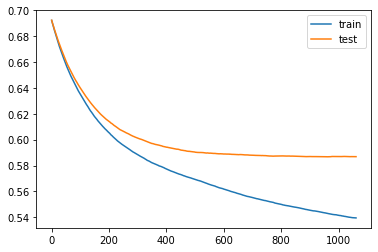

In [387]:
model = XGBClassifier(max_depth=14, learning_rate=0.005, n_estimators=5000, gamma=2.5, 
                        min_child_weight=5, subsample=0.85, colsample_bytree=0.63, reg_alpha=18,reg_lambda=0.7)
print(model)
eval_set =  [(x_train, y_train), (x_test,y_test)]
model.fit(x_train,y_train, early_stopping_rounds=100, eval_metric="logloss", eval_set=eval_set, verbose= True)

score = model.score(x_train,y_train)
print("Training Score: ",score)
results = model.evals_result()
plt.plot(results['validation_0']['logloss'], label='train')
plt.plot(results['validation_1']['logloss'], label='test')
# show the legend
plt.legend()
# show the plot
plt.show()

In [ ]:
scores = cross_val_score(model, x_train, y_train, cv=5)
print("Mean cross-validation score: %.2f" % scores.mean())

In [388]:
predictions =  model.predict(x_test)
accuracy =accuracy_score(y_test, predictions)
print(accuracy *100.0)

70.8


<Figure size 1440x1080 with 0 Axes>

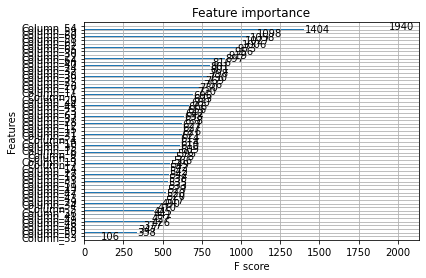

In [124]:
from xgboost import plot_importance
from matplotlib  import pyplot

plt.figure(figsize=(20,15))
plot_importance(model)
pyplot.show()

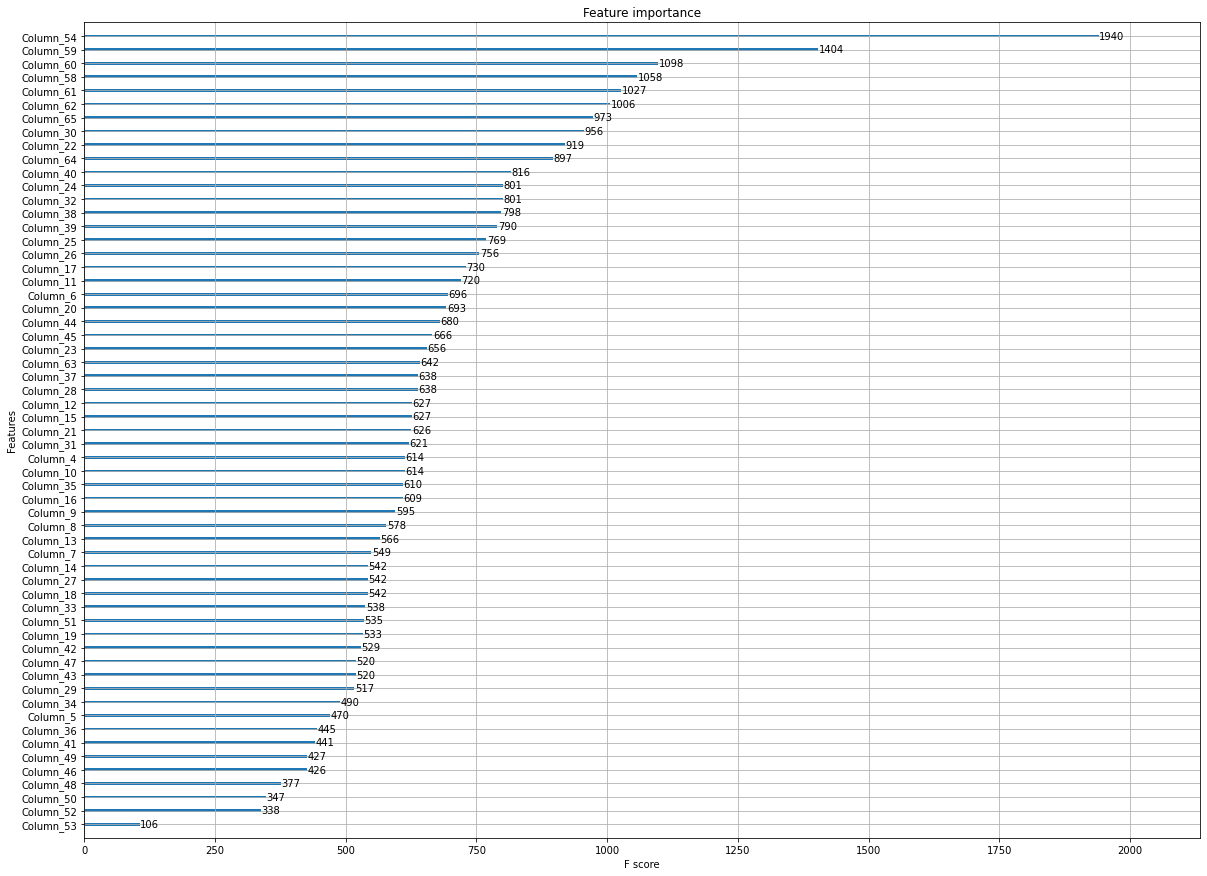

In [125]:
plt.figure(figsize=(20,15))
plot_importance(model, ax=plt.gca())
pyplot.show()

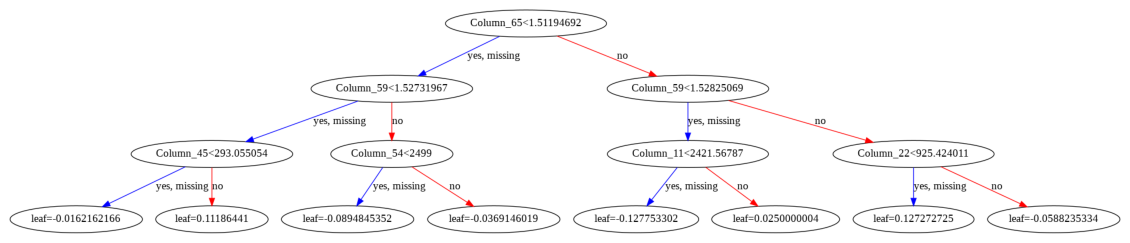

In [13]:
import xgboost as xgb
plt.figure(figsize=(20,15))
xgb.plot_tree(model, ax=plt.gca());

In [110]:
uploaded = files.upload()

Saving CSE_DSIntro1_TEST.csv to CSE_DSIntro1_TEST (1).csv


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [140]:
td = pd.read_csv (io.BytesIO(uploaded['CSE_DSIntro1_TEST.csv']))
print(td)

        Id  Column_1     Column_2  ...  Column_75  Column_76  Column_77
0        1  77117.50  44514.90373  ...         22          2       2021
1        2  77120.00  44516.34682  ...         22          2       2021
2        3  77120.00  44516.34682  ...         22          2       2021
3        4  77120.00  44516.34682  ...         22          2       2021
4        5  77120.00  44516.34682  ...         22          2       2021
...    ...       ...          ...  ...        ...        ...        ...
1586  1587  77120.00  44516.34682  ...         22          2       2021
1587  1588  77117.50  44514.90373  ...         22          2       2021
1588  1589  77122.25  44517.64560  ...         22          2       2021
1589  1590  77122.25  44517.64560  ...         22          2       2021
1590  1591  77122.25  44517.64560  ...         22          2       2021

[1591 rows x 78 columns]


In [325]:
tX= td[['Column_4',
       'Column_6', 'Column_7', 'Column_8','Column_9', 'Column_10',
       'Column_11','Column_12', 'Column_13', 'Column_14', 'Column_15', 
       'Column_16','Column_17', 'Column_18', 'Column_19', 'Column_20', 
       'Column_21','Column_22', 'Column_23', 'Column_24', 'Column_25',
       'Column_26','Column_27', 'Column_28', 'Column_29', 'Column_30',
       'Column_31','Column_32', 'Column_33', 'Column_34', 'Column_35',
       'Column_36','Column_37', 'Column_38', 'Column_39', 'Column_40',
       'Column_41','Column_42', 'Column_43', 'Column_44', 'Column_45',
       'Column_46','Column_47', 'Column_48', 'Column_49', 'Column_50',
       'Column_51','Column_52', 'Column_54', 'Column_58', 'Column_59', 'Column_60',
       'Column_61','Column_62', 'Column_63', 'Column_64', 'Column_65']]

In [389]:
predictions =  model.predict(tX)

TypeError: ignored

In [390]:
Id = td['Id']
Category = predictions
res = pd.DataFrame({'Id':Id,'Category':Category})
type (res)


pandas.core.frame.DataFrame

In [391]:
res.value_counts('Category')

Category
0    1428
1     163
dtype: int64

In [379]:
res.to_csv("predictions15.csv",index=False)

In [202]:
model.save_model('0.709.h5')

In [67]:
thr ={}
thresholds = (model.feature_importances_)
for i in range(len(thresholds)):
  thr[i] = thresholds[i]
print(thr)
dic = {k: v for k, v in sorted(thr.items(), key=lambda item: item[1])}
print(dic)

{0: 0.036440693, 1: 0.032142237, 2: 0.051048573, 3: 0.029919608, 4: 0.037373256, 5: 0.045195244, 6: 0.055958275, 7: 0.07599827, 8: 0.06767309, 9: 0.06792883, 10: 0.064916, 11: 0.11796392, 12: 0.040004946, 13: 0.06284632, 14: 0.05085353, 15: 0.06104983, 16: 0.047663473, 17: 0.055023927}
{3: 0.029919608, 1: 0.032142237, 0: 0.036440693, 4: 0.037373256, 12: 0.040004946, 5: 0.045195244, 16: 0.047663473, 14: 0.05085353, 2: 0.051048573, 17: 0.055023927, 6: 0.055958275, 15: 0.06104983, 13: 0.06284632, 10: 0.064916, 8: 0.06767309, 9: 0.06792883, 7: 0.07599827, 11: 0.11796392}


In [80]:

# select features using threshold
selection = SelectFromModel(model, threshold=0.00000, prefit=True)
select_x_train = selection.transform(x_train)
print(x_train)
# train model
selection_model = XGBClassifier()
selection_model.fit(select_x_train, y_train)
# eval model
select_x_test = selection.transform(x_test)
y_pred = selection_model.predict(select_x_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Thresh=%.5f, n=%d, Accuracy: %.3f%%" % (thresh, select_x_train.shape[1], accuracy*100.0))

      Column_12  Column_21  Column_24  ...  Column_65  Column_67  Column_68
275   1480.6560  1326.4210  1727.4320  ...   1.512161         25         15
64    1634.9440  1264.7680  1326.4640  ...   1.512225         23         42
260    431.8986  1233.9960   863.7972  ...   1.512056         25          8
972   1233.8800   956.2570   586.0930  ...   1.511249         30         32
2247  1480.6560  1172.1860   802.0220  ...   1.511014         40         32
...         ...        ...        ...  ...        ...        ...        ...
1164  1079.7115   740.3736   832.9203  ...   1.511176         32          0
2359  1141.3760  1480.7040  2313.6000  ...   1.510882         41         26
1942  1079.6800   771.2000  1604.0960  ...   1.512094         38          5
2064  1480.7952   339.3489   894.6471  ...   1.511370         39          4
865   1881.7280   586.1120  1696.6400  ...   1.511199         29         42

[2000 rows x 18 columns]
Thresh=0.06105, n=18, Accuracy: 73.000%


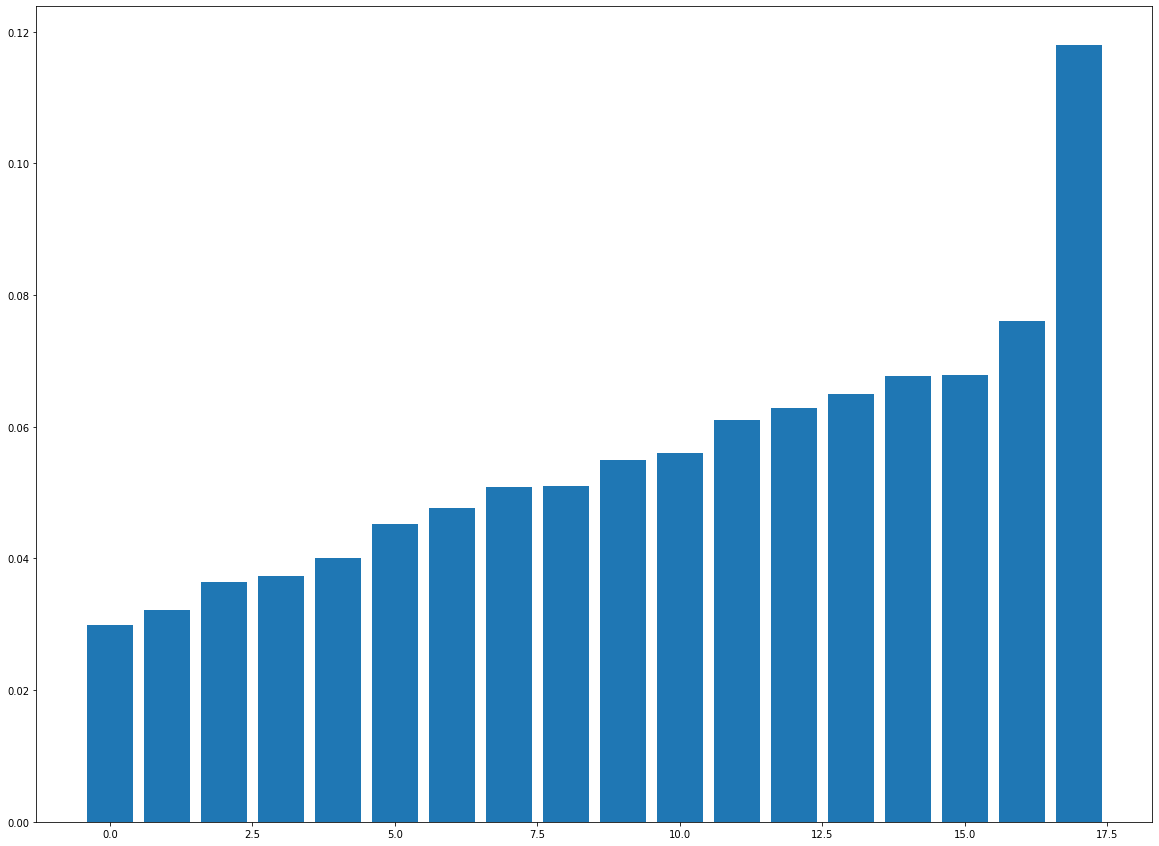

In [66]:
plt.figure(figsize=(20,15))
pyplot.bar(range(len(model.feature_importances_)), np.sort(model.feature_importances_))
pyplot.show()

In [52]:
X= df[['Column_12', 'Column_21', 'Column_24','Column_28', 
       'Column_36', 'Column_38', 'Column_51','Column_52', 'Column_54','Column_59', 'Column_60',
       'Column_61','Column_62', 'Column_63', 'Column_64', 'Column_65','Column_67', 'Column_68',      
       ]]

Y= df['Category']
print(X)
print(Y)

x_train, x_test, y_train, y_test =train_test_split(X,Y, test_size=0.2)

      Column_12  Column_21  Column_24  ...  Column_65  Column_67  Column_68
0     1510.0134   986.1312  1479.1968  ...   1.511320         23         15
1     1604.0960  1357.3120  1203.0720  ...   1.511169         23         15
2      678.6560   308.4800   987.1360  ...   1.511256         23         15
3     1141.3390   401.0110  1079.6450  ...   1.511489         23         16
4     1789.1840  1850.8800  1542.4000  ...   1.511393         23         16
...         ...        ...        ...  ...        ...        ...        ...
2495  1573.1970  1017.9510   555.2460  ...   1.510860         42         33
2496  1388.1600   863.7440  1357.3120  ...   1.511402         42         34
2497  1110.4920   555.2460   987.1040  ...   1.511400         42         34
2498  1264.7270  1172.1860   802.0220  ...   1.511201         42         35
2499  1295.6160  1048.8320   925.4400  ...   1.511293         42         35

[2500 rows x 18 columns]
0       0
1       0
2       0
3       0
4       0
       ..
24

In [53]:
model = XGBClassifier()
eval_set = [(x_test, y_test)]
model.fit(x_train,y_train, early_stopping_rounds=5, eval_metric="logloss", eval_set=eval_set, verbose= True)

[0]	validation_0-logloss:0.674806
Will train until validation_0-logloss hasn't improved in 5 rounds.
[1]	validation_0-logloss:0.65974
[2]	validation_0-logloss:0.646432
[3]	validation_0-logloss:0.636096
[4]	validation_0-logloss:0.626822
[5]	validation_0-logloss:0.618947
[6]	validation_0-logloss:0.613105
[7]	validation_0-logloss:0.608593
[8]	validation_0-logloss:0.603712
[9]	validation_0-logloss:0.599498
[10]	validation_0-logloss:0.596545
[11]	validation_0-logloss:0.593373
[12]	validation_0-logloss:0.590654
[13]	validation_0-logloss:0.589175
[14]	validation_0-logloss:0.5872
[15]	validation_0-logloss:0.585051
[16]	validation_0-logloss:0.583024
[17]	validation_0-logloss:0.580979
[18]	validation_0-logloss:0.580119
[19]	validation_0-logloss:0.579046
[20]	validation_0-logloss:0.577593
[21]	validation_0-logloss:0.576275
[22]	validation_0-logloss:0.576103
[23]	validation_0-logloss:0.57607
[24]	validation_0-logloss:0.575479
[25]	validation_0-logloss:0.573985
[26]	validation_0-logloss:0.573964
[2

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [56]:
predictions =  model.predict(x_test)
accuracy =accuracy_score(y_test, predictions)
print(accuracy *100.0)

71.39999999999999


In [57]:
uploaded = files.upload()

Saving CSE_DSIntro1_TEST.csv to CSE_DSIntro1_TEST.csv


In [59]:
td = pd.read_csv (io.BytesIO(uploaded['CSE_DSIntro1_TEST.csv']))
print(td)

        Id  Column_1     Column_2  ...  Column_75  Column_76  Column_77
0        1  77117.50  44514.90373  ...         22          2       2021
1        2  77120.00  44516.34682  ...         22          2       2021
2        3  77120.00  44516.34682  ...         22          2       2021
3        4  77120.00  44516.34682  ...         22          2       2021
4        5  77120.00  44516.34682  ...         22          2       2021
...    ...       ...          ...  ...        ...        ...        ...
1586  1587  77120.00  44516.34682  ...         22          2       2021
1587  1588  77117.50  44514.90373  ...         22          2       2021
1588  1589  77122.25  44517.64560  ...         22          2       2021
1589  1590  77122.25  44517.64560  ...         22          2       2021
1590  1591  77122.25  44517.64560  ...         22          2       2021

[1591 rows x 78 columns]


In [70]:
tX= td[['Column_12', 'Column_21', 'Column_24','Column_28', 
       'Column_36', 'Column_38', 'Column_51','Column_52', 'Column_54','Column_59', 'Column_60',
       'Column_61','Column_62', 'Column_63', 'Column_64', 'Column_65','Column_67', 'Column_68']]

In [81]:
select_x_test = selection.transform(tX)
y_pred = selection_model.predict(select_x_test)

In [82]:
Id = td['Id']
Category = y_pred
res = pd.DataFrame({'Id':Id,'Category':Category})
type (res)
res.to_csv("predictions3.csv",index=False)